This Jupyter notebook is a property of the University of California and copyrighted by Dipak Ghosal. Only personal use for ECS 132 class is allowed. Uploading this to any shared site is a violation of the University of California copyright laws

# V. Discrete Random Variables

In this chapter we will define random variables and discuss probability distributions. We will then cover four important discrete distributions - Bernoulli, Binomial, Geometric, and Poisson. Each distribution is characterized by a set of parameters (such as the mean and standard deviation).  Thus you will hear distributions described as belonging to a particular parametric family of distributions (meaning "the Bernoulli family", "the Binomial family", etc). More advanced statistics classes cover non-parametric distributions. 

## Random Variables
A **random variable** is a function mapping the sample space $S$ to the set of real numbers $\mathbb{R}$. This is shown in Figure \@ref(fig:discrete-random-variable) where $X$ is a random variable  which summarizes some aspect of the experiment. Discrete random variables map the sample space to the integers $\mathbb{Z}$. (Remember that $\mathbb{Z} \in \mathbb{R}$.) Continuous random variables, and their associated parametric distributions, will be discussed in Chap VII. 


![Discrete-random-variable](Figures/Discrete-Random-Variable.jpg)



The term variable is a misnomer. Random variables are actually functional mappings from the sample space to the set of real numbers (i.e., a random variable describes an event). The sample space can be very abstract and yet it gets mapped to a value in $\mathbb{R}$.

***Example: Coin Toss Revisited*** Suppose three coins are tossed. There are 8 outcomes:  
$\{(H,H,H), (H,H,T), (H,T,H), (H,T,T), (T,H,H), (T,H,T), (T,T,H), (T,T,T) \}$

We can define the following random variable

\begin{equation*}
Y = \text{The number of heads that appear}
\end{equation*}

We can see that

\begin{eqnarray*}
Y(H,H,H) &=& 3 \\
Y(H,H,T) &=& 2 \\
Y(H,T,H) &=& 2 \\
Y(H,T,T) &=& 1 \\
Y(T,H,H) &=& 2 \\
Y(T,H,T) &=& 1 \\
Y(T,T,H) &=& 1 \\
Y(T,T,T) &=& 0 \\
\end{eqnarray*}

We can define other, different random variables on the sample space.  Recall that **multiple events can be defined for the same experiment**.  For example

\begin{eqnarray*}
X &=& 1 ~~~~ \text{if all heads or all tails} \\
  &=& 0 ~~~~ \text{otherwise}
\end{eqnarray*}

Based on definition of the random variable, we can enumerate the different values corresponding the various outcomes of the experiment. 

\begin{eqnarray*}
X(H,H,H) &=& 1 \\
X(H,H,T) &=& 0 \\
X(H,T,H) &=& 0 \\
X(H,T,T) &=& 0 \\
X(T,H,H) &=& 0 \\
X(T,H,T) &=& 0 \\
X(T,T,H) &=& 0 \\
X(T,T,T) &=& 1 \\
\end{eqnarray*}

$X$ and $Y$ are two different random variables and as mentioned they summarize two differrent aspects of the experiment.


Consider the random variable $Y$. Note that  $Y = 1$ is an event. It corresponds to the outcomes $\{(T,T,H), (T,H,T), (H,T,T)\}$.  Since $Y=1$ is an event, we can find $P(Y = 1)$.

\begin{eqnarray*}
P(Y = 1) &=& P((T,T,H) \cup (T,H,T) \cup (H,T,T)) \\[2mm]
         &=& P(T,T,H) + P(T,H,T) + P(H,T,T) \\[2mm]
         &=& \frac{1}{8} + \frac{1}{8} + \frac{1}{8}\\[2mm]
         &=& \frac{3}{8}
\end{eqnarray*}

(The second line follows since the different outcomes are mutually exclusive (i.e., non-ovelapping).)

We can also calculate $P(Y)$ for the other values that $Y$ takes on.  Also, note that since $Y$ is a function and  maps onto all of the outcomes the sample space $S = \cup_i (Y=i)$.



## V.1. Probability Mass Function (PMF) of a Discrete Random Variable ##

Let's start by considering the example above. The probability $P(Y=i)$, for $i=0,1,2,3$, is the probability mass function (PMF) for the coin toss example. It gives how the probability is distributed over the different values that the random variable can take on.  Let's plot the PMF of $Y$.


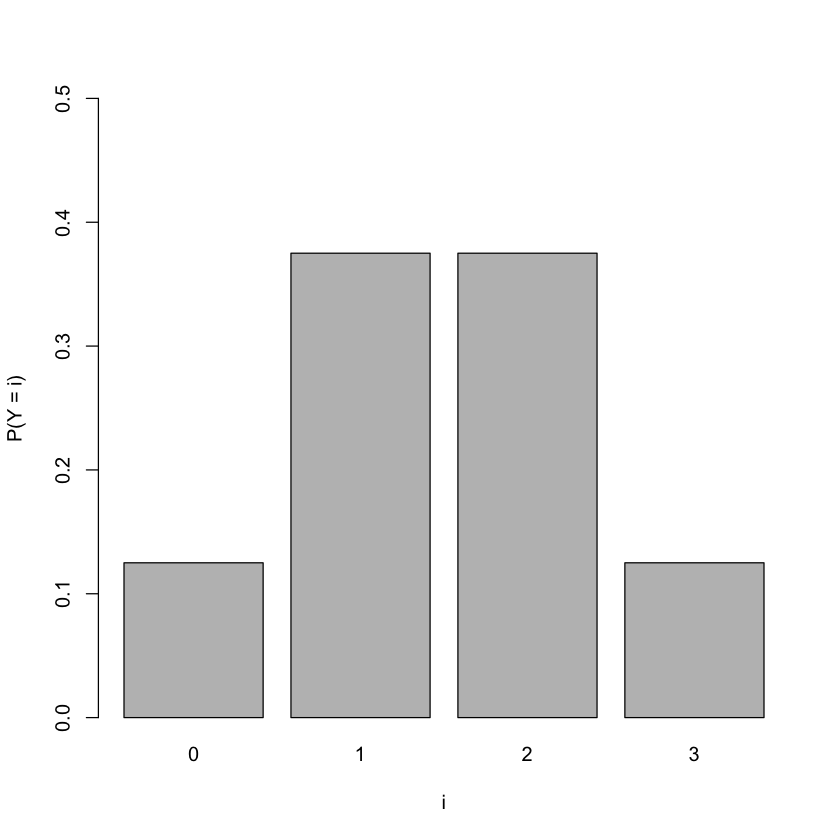

In [1]:
pmf = c(0.125, 0.375, 0.375, 0.125)  #The values of the probabilities for the 4 different choices of i 
xvalues = c(0,1,2,3)
barplot(pmf, names.arg = xvalues, ylim =c(0,0.5), xlab = "i", ylab="P(Y = i)")

### Writing a general PMF ###

Suppose $a_1, a_2, \ldots, a_n$ are all the possible values that the random variable can take. Then the PMF is
\begin{equation*}
p_j = P(X = a_j) ~~~~ \text{for all $j$}
\end{equation*}
where $p_j \geq 0$ and $\sum_j p_j = 1$


## V.2. The Cummulative Distribution Function (CDF) of a Discrete Random Variable ##
Note  that a combination of multiple events, such as $(Y \leq 1)$, is also an event. Explicitly, for the coin toss example, $(Y \leq 1) = (Y=0) \cup (Y=1)$ and it corresponds  to the subset of outcomes $\{((T,T,H), (T,H,T), (H,T,T)) \cup (T,T,T) \} = \{(T,T,H), (T,H,T), (H,T,T), (T,T,T) \}$.

Consequently, we can also find $P(Y \leq 1)$ which is given by

\begin{eqnarray*}
P(Y \leq 1) &=& P((Y=0) \cup (Y=1)) \\
            &=& P(Y=0) + P(Y=1)
\end{eqnarray*}

We can do this for other values that $Y$ takes.

$P(Y \leq i), i = 0, 1, 2, 3$ is called the Cumulative Distribution Function (CDF). We can plot this:


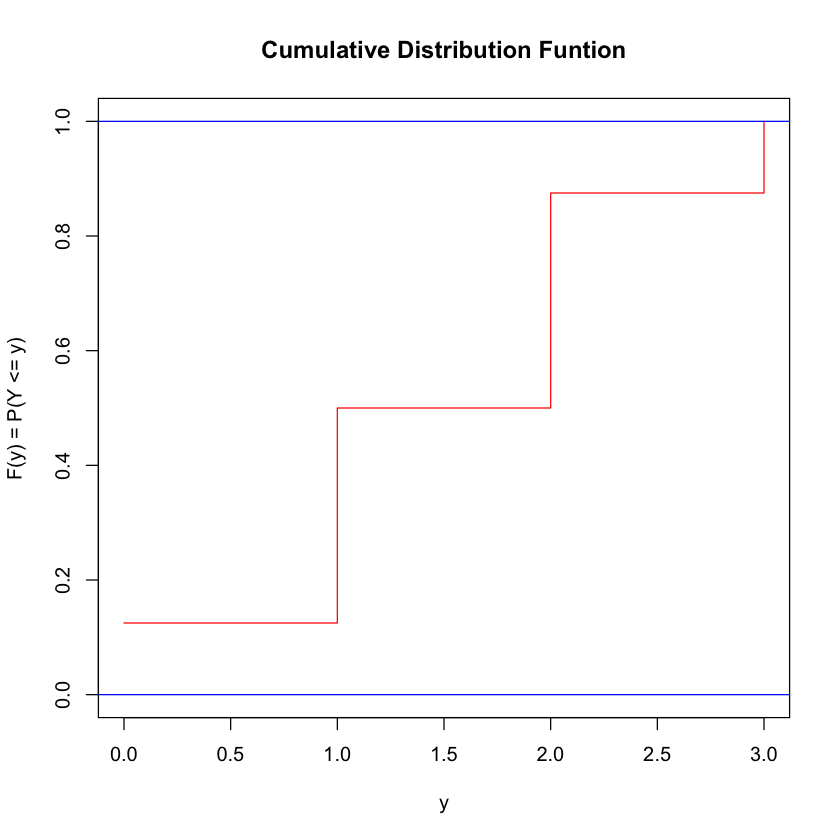

In [2]:
pmf = c(0.125, 0.375, 0.375, 0.125)
yvalues = c(0,1,2,3)
cdf = cumsum(pmf)   # note the use of the R function "cumsum"
#### Writing a general PMF ####
plot(yvalues, cdf, type = 's', ylim = c(0,1), ylab="F(y) = P(Y <= y)",col=2,xlab="y", main="Cumulative Distribution Funtion");abline(h=0:1,col=4)

### Specifying a general CDF ###

Let $X$ denote a discrete random variable. We will use the notation $F_X(x)$ to denote a Cumulative Distribution Function (CDF). Specifically: 
\begin{equation*}
F_X (x) = P(X \leq x)
\end{equation*}
where $x$ is any real value.  Note that $F_X (x)$ is defined for all real values even for a discrete random variable.


***Properties of a CDF for a discrete random variable***

1. Right continuous  
2. Jump discontinuties present (due to discrete nature of the random variable)
3. Monotonically increasing with $x$
4. $F_X (x) \rightarrow 0$ as $x \rightarrow -\infty$  
5. $F_X (x) \rightarrow 1$ as $x \rightarrow \infty$  
6. Given the PMF we can find the CDF.  
7. Given the CDF and the values that the random variable can take on, we can find the PMF.  
8. We can  show that  
\begin{equation}
P(a  < X \leq b) = F_X (b)  - F_X (a)
\end{equation}
 We can write
 \begin{equation}
 (X \leq  b) = (X \leq a) \cup (a < X \leq b)
 \end{equation}

 Since the two events in the RHS are disjoint (i.e., non-overlapping), we have
 \begin{eqnarray}
P(X \leq  b) &=& P((X \leq a) \cup (a < X \leq b)) \\
             &=& P(X \leq a) + P(a < X \leq b)
 \end{eqnarray}
From which the result follows.

This last property motivates most of the use cases of CDFs: maybe we want to know the probability of $X$ falling within some range, or the probability that $X$ will be greater or lesser than some set quantity. The CDF is also useful for analyzing data obtained from a numerical simulation since it smooths over fluctuations present in the PMF. 


## V.3. Expectation and Variance

## Expectation of a Discrete Random Variable

If $X$ is a discrete random variable and takes values $x_1, x_2, x_3, \ldots , x_n$  then expected value of $X$ denoted by $E(X)$ is  given by 

\begin{equation}
E(X) = \sum_{i=1}^{n} p_i x_i
\end{equation}

where $p_i = P(X = x_i)$. 


1. This is also called the **mean** or the **average** or **the first moment**.
2. This would also apply to a countably infinite sample space in which case $n = \infty$. 

## Variance of a Discrete Random Variable

If $X$ is a discrete random variable and takes values $x_1, x_2, x_3, \ldots , x_n$  then the variance of $X$ denoted by $Var(x)$ is  given by 

\begin{eqnarray}
Var(X) &=&  E(X^2) - (E(X))^2\\
       &=& \sum_{i=1}^{n} p_i x_i^2 - (\sum_{i=1}^{n} p_i x_i)^2
\end{eqnarray}

where $p_i = P(X = x_i) $. 

1. $E(X^2)$ is called the second moment. 
2. The standard deviation typically denoted by $\sigma$ is the square root of the variance, i.e, $\sigma = \sqrt{Var(X)}$. 
3. The standard deviation measures how the probability mass is distributed around the mean. The large the value of $\sigma$ the wider the spread. 

From times when you have taken the standard deviation of a set of data, you may be more familiar with the definition that $\text{Var}[x] = E \left( x - E(X)\right)^2$. This is equivalent to the definition above: 
\begin{eqnarray}
E \left( x - E(X)\right)^2 & = & \sum_{i=1}^{n} p_i \left( x_i - E(X)\right)^2 \\[1mm]
&=& \sum_{i=1}^{n} p_i \left(x_i^2 - 2 x_i E(X) + E(X)^2 \right)\\[1mm]
&=& \sum_{i=1}^{n} p_i x_i^2 - 2 E(X) \sum_{i=1}^{n} p_i x_i + E(X)^2\\[1mm]
&=& E(X^2) - \left(E(X)\right)^2
\end{eqnarray}


## V.4. Bernoulli Distribution
A random variable $X$ is said to have a Bernoulli distribution if $X$ has two possible values 1 (success) and 0 (failure) where $P(X=1) = p$ and $P(X=0) = q = 1 - p$. One can think of this as the most basic distribution function. Given the Axioms we have chosen to assume, it is difficult to come up with a simpler distribution. To indicate that $X$ is distributed according to a Bernoulli distrution with parameter $p$ we say 

$$X \sim \text{Bern}(p)$$. 

***Example: Yet Another Coin Toss***  
A coin toss has a Bernoulli distribution where the random variable $X$ maps Heads  to 1 and Tails to 0. $P(X = 1) = p$ and $P(X = 0) = 1-p$, where $p = 0.5$ for a fair coin.  So $X \sim$ Bern(0.5).

***Example: Birthday Paradox Revisited***  
Note that success (and hence failure) can be very general. Consider the birthday paradox problem.
Suppose there are 20 people in a room. Suppose we define Success as there are no matching birthdays and Failure as at least one matching birthday.  Note that this definition is an exhaustive in the sense that it covers all possible outcomes of matchings.

We can map $Y(\text{success}) = 1$ and $Y(\text{failure}) = 0$ and then we have

\begin{eqnarray*}
p      &=& P(Y=1) \\
       &=& \frac{365 \times 364 \times \ldots \times 346}{365^k} \\
       &=& \text{find the value based on $k$}
\end{eqnarray*}

and hence

\begin{eqnarray*}
P(Y=0) &=& 1 - p \\
       &=& \text{find the value based on $k$}
\end{eqnarray*}


### V.4.a) Expectation and Variance of Bernoulli

\begin{equation}
E(X) = \sum_i p_i x_i = 1 \cdot p + 0 \cdot (1 - p) = p
\end{equation}  

\begin{eqnarray}
Var(X) &=& E(X^2) - (E(X))^2 \\ 
       &=& \sum_i p_i x_i^2 - (E(X))^2 \\
       &=& 1 \cdot p + 0 \cdot (1-p) - (E(X))^2 \\
       &=& p - p^2 \\
       &=&  p(1-p)
\end{eqnarray}


<h4 align="center">
In summary,  $E(X)=p$   and   $Var(X) = p(1-p)$.
</h4>

#### Example

Suppose $X \sim \text{Bern}(0.6)$.  

\begin{equation}
X = 
\begin{cases}
	1 & \text{with probability $p = 0.6$} \\
	0 & \text{with probability $1-p = 0.4$}
\end{cases}
\end{equation} 

$E(X) = p = 0.6$

$Var(X) = p(1-p) = 0.6*0.4 = 0.24$

Plotting the PMF:

[1] 0.02


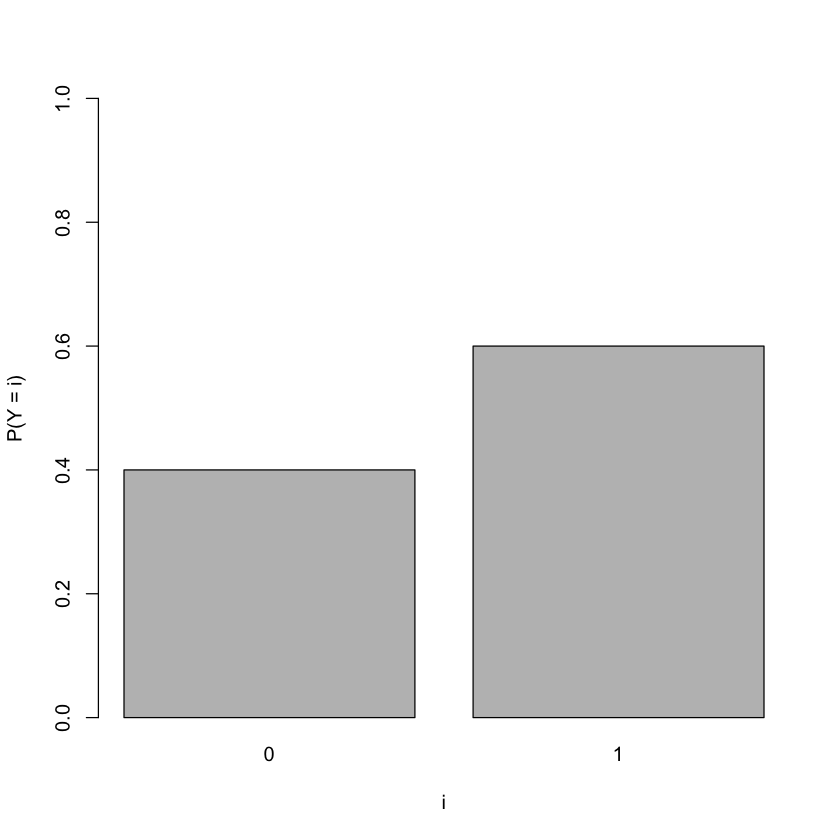

In [32]:
pmf = c(0.4, 0.6)
xvalues = c(0,1)
barplot(pmf, names.arg = xvalues, ylim =c(0,1.0), xlab = "i", ylab="P(Y = i)")

## V.5. Binomial Distribution
We can see that the Bernoulli Random Variable is useful for some relatively simple experiments, but what if we want to know **how many successes we can expect to have in a series of Bernoulli trials?** For that, we have the Binomial Random Variable: It expresses the number of successes $X$ in $n$ independent $\text{Bern}(p)$ trials where $p$ is the probability of success. Its distribution is given by:  

\begin{equation}
        P(X=k) = {\binom{n}{k}} p^k (1-p)^{n-k}  ~~~~~~~~~ 0 \leq k \leq n
\end{equation}

The first term is of course the number of ways we can select $k$ of the $n$ trials. The second term is the probability that we succeeded $k$ times (each trial is independent). The third term is the probability that we failed $(n-k)$ times. 

Note that Binomial random variable has 2 parameters $n$ and $p$ and to indicate that $X$ follows this distribution will be written as

$$X \sim \text{Binom}(n,p)$$.

### V.5.a) Expectation and Variance

\begin{equation}
E(X) = np
\end{equation}  

\begin{equation}
Var(X) = np(1-p)
\end{equation}

The explicit calculation is left to the interested reader starting from the fact that 
$$E(X) = \sum_{k=0}^n p_k k = \sum_{k=0}^n {\binom{n}{k}} p^k (1-p)^{n-k} k$$ 

### V.5.b) Properties

1. We can plot the PMF and see how shape of the PMF changes with $n$ and $p$. Make sure you understand why the shape changes.  

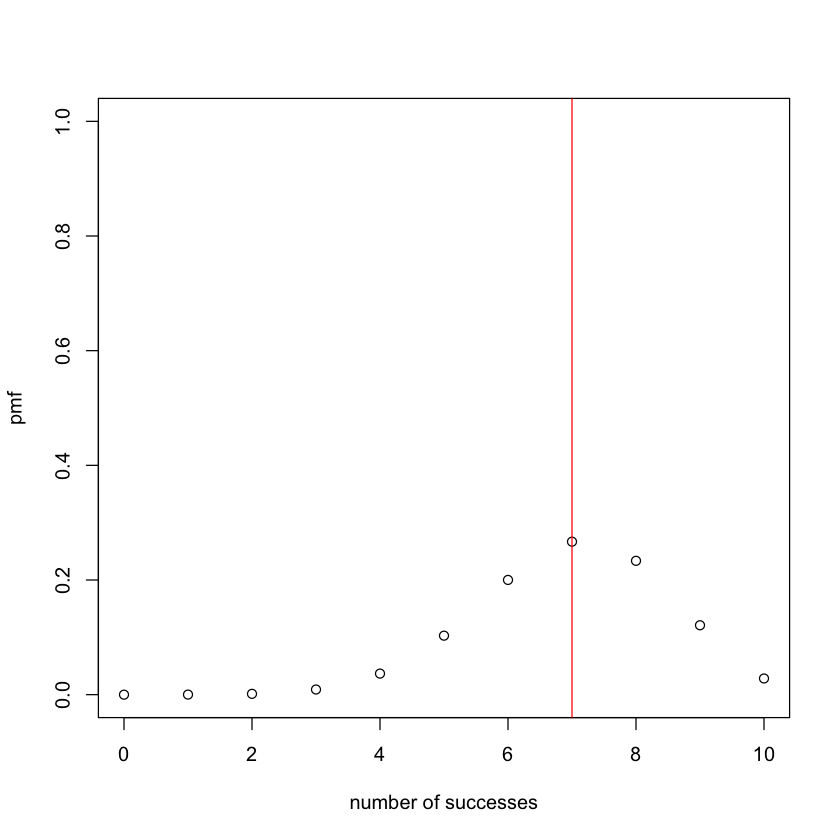

In [58]:
n = 10
p = 0.7
plot(x=0:n, dbinom(0:n, n, p), ylim=c(0,1.0),ylab="pmf", xlab="number of successes") # note dbinom R function 
mean = n*p
abline(v=mean, col="red")

For a given value of $n$, the value of $i$ for which the probability has the maximum value changes with $p$. For $p=0.5$ the probability is maximum for $\lfloor{0.5*(n+1)}\rfloor$ (check this). 

### Practice Problem 1

On a multiple-choice exam with 3 possible answers for each of the 5 questions, what is the probability that a student will get 4 or more correct answers just by guessing?

### Answer

If the answer is guessed, then $p$,  the probability of getting a correct answer is 1/3. For $n = 5$ questions, let $X$ denote the number of correct answers. $X \sim Binom(n=5, p=1/3)$. Thus, the probability of 4 or more correct answers is given by

\begin{eqnarray*}
  P(4~\text{or more correct answers}) & = & \sum_{i=4}^5 {5 \choose i} p^i (1-p)^{5-i}\\[2mm]
                               & = & {5 \choose 4} p^4 (1-p) + {5 \choose 5} p^5 (1-p)^0 \\[2mm]    
                               & = & 5 ~ (1/3)^4 ~ (2/3) + (1/3)^5
\end{eqnarray*}

### Practice Problem 2

Suppose a bit stream is subject to errors, with each bit having probability $p$ of error, and with
the bits being independent. Consider a set of four particular bits. Let $X$ denote the number of
erroneous bits among those four.

  1. Find $P(X = 2)$ and $E(X)$.
  
  2. To what famous parametric family of distributions does the distribution of $X$ belong to?
  
  3. Let $Y$ denote the maximum number of consecutive erroneous bits. Find $P(Y = 2)$ and $Var(Y)$.

#### Answer

  1. $X$ is a Binomial random variable with parameters $(4, p)$. Thus, $P\{X=2\}$ is given by
  \begin{equation*}
    P\{X=2\} ~=~ {4 \choose 2} p^2 (1-p)^2
  \end{equation*}
  
  Based on the derivation in the class, $E(X)=np$ as given by

\begin{equation*}
    E(X) ~=~ 4p
\end{equation*}
  
 2. $X$ is a Binomial random variable.
 
 
 3. The random variable $Y$ takes values $0, 1, 2, 3, 4$.



|     number  |  outcome | Y  |
|-------------|----------|----|
|    1        | cccc     | 0  |
|-------------|----------|----|
|     2       | ccce     | 1  |
|-------------|----------|----|
|     3       | ccec     | 1  | 
|-------------|----------|----|
|     4       | ccee     | 2  | 
|-------------|----------|----|
|     5       | cecc     | 1  |
|-------------|----------|----|
|     6       |  cece    | 1  |
|-----------------------------|
|     7       | ceec     | 2  |
|-------------|----------|----|
|     8       | ceee     | 3  |
|-------------|----------|----|
|     9       |  eccc    | 1  |
|-------------|----------|----|
|    10       | ecce     | 1  |
|-----------------------------|
|    11       | ecec     | 1  |
|-------------|----------|----|
|    12       | ecee     | 2  |
|-------------|----------|----|
|    13       | eecc     | 2  |
|-------------|----------|----|
|    14       | eece     | 2  |
|-------------|----------|----|
|    15       | eeec     | 3  |
|-------------|----------|----|
|    16       | eeee     | 4  |
|-------------|----------|----|

Based on the above table,  we can derive the following

\begin{eqnarray*}
  P\{Y=0\} &=& (1-p)^4 \\
  P\{Y=1\} &=& 4 p (1-p)^3 + 3 p^2 (1-p)^2\\
           &=& p(1-p)^2 (4-p) \\
  P\{Y=2\} &=& 2 p^3 (1-p) + 3~p^2 (1-p)^2  \\
           &=& p^2 (1-p)(3-p) \\
  P\{Y=3\} &=& 2 (1-p)*p^3 \\
  P\{Y=4\} &=& p^4
\end{eqnarray*}

Now we can derive $E[Y]$ and $Var[Y]$. We can show that
\begin{equation*}
  E[Y] = p (4 - 3p - p^3)
\end{equation*}

\begin{equation*}
  E[Y^2] = p(4 + 3p + 4p^2 + p^3)
\end{equation*}

\begin{equation*}
  Var[Y] = E[Y^2] - (E[Y])^2
\end{equation*}

### V.5.c) R Functions

There are four R functions **dbinom, pbinom, qbinom, and rbinom**. Summary:
1. dbinom takes arguments $j,n,p$ and returns the PMF, $p_j$. (Recall $p_j = P(X=j)$.)
2. pbinom takes arguments $x,n,p$ and returns the CDF, $F_X(x)$.
3. qbinom takes arguments $x,n,p$ and returns the first value of $j$ for which the CDF is just greater than or equal to the specied value $x$. 
4. rbinom samples from the binomial distribution 

Diving into each function: 


1. **dbinom** gives the pmf of the binomial distribution. It take 3 parameters $j, n, p$ and returns the probability $p_j = P(X=j)$.

In [56]:
help("dbinom")

In [7]:
n = 10
p = 0.5
j = 3     # dbinom will return p_j (that is P(X=j))
dbinom(j, n, p)

[1] 0.1171875

One can also give a sequence of values as in the following example

In [8]:
n = 100
p = 0.3
j = 35:45
dbinom(j, 100, 0.3)

[1] 0.0467796824 0.0361985637 0.0268344565 0.0190665875 0.0129904223
 [6] 0.0084901688 0.0053248446 0.0032057738 0.0018531715 0.0010288712
[11] 0.0005487313

or a vector of values

In [9]:
n = 100
p = 0.3
j = c(35, 45, 20, 50)
dbinom(j, 100, 0.3)

[1] 4.677968e-02 5.487313e-04 7.575645e-03 1.302623e-05

2. **pbinom** gives the cumulative distribution function. Suppose 𝑋∼Binom(n=100,p=0.5) and we want to find $𝐹_𝑋(54)$ which is by definition $P(𝑋 \le 54)$

In [61]:
n = 100
p = 0.5
x = 54
pbinom(x, n, p)

[1] 0.8158992

Remember that the CDF is defined for all real values. So we can evaluate $F_X (54.7)$ which will same as $F_X (54)$ since the CDF jumps discontinuously at integer values of $x$ for discrete random variables. 

In [65]:
n = 100
p = 0.5
x = 54.7
pbinom(x, n, p)

[1] 0.8158992

We can also give a range of values or even a vector of values

In [67]:
n = 100
p = 0.5
x = 45:54
pbinom(x, n, p)
y = c(40, 50, 60)
pbinom(y, n, p)

[1] 0.1841008 0.2420592 0.3086497 0.3821767 0.4602054 0.5397946 0.6178233
 [8] 0.6913503 0.7579408 0.8158992

[1] 0.02844397 0.53979462 0.98239990

3. **qbinom** takes as an input a probability ($q$) and returns the value $j$ for which the cdf is just greater than $q$, i.e., finds $x$ such that $F_X (x)~ \text{is equal to or just greater than} ~q$.  Here, is an example

In [48]:
n = 100
p = 0.3
q = 0.4
qbinom(q, n, p)
# we can check
pbinom(qbinom(q, n, p), n, p)  #Recall pbinom gives the CMF
# check with 1 less
pbinom(qbinom(q, n, p) -1, n, p)

[1] 29

[1] 0.4623397

[1] 0.3767782

We can also give a sequence or vector of probabilities

In [15]:
n = 100
p = 0.3
q = c(0.01, 0.4, 0.8)
qbinom(q, n, p)

[1] 20 29 34

4. **rbinom**: This function can be used to generate samples that follow the binomial distribution. Suppose we want 7 samples drawn from a binomial distribution with parameter $n = 10$ and $p =0.3$.  First we plot the PMF and then we plot the results of sampling to show the agreement between them. (Recall that sampling is running a numerical simulation that will approximate the real probabilities for a large enough sample size.)  

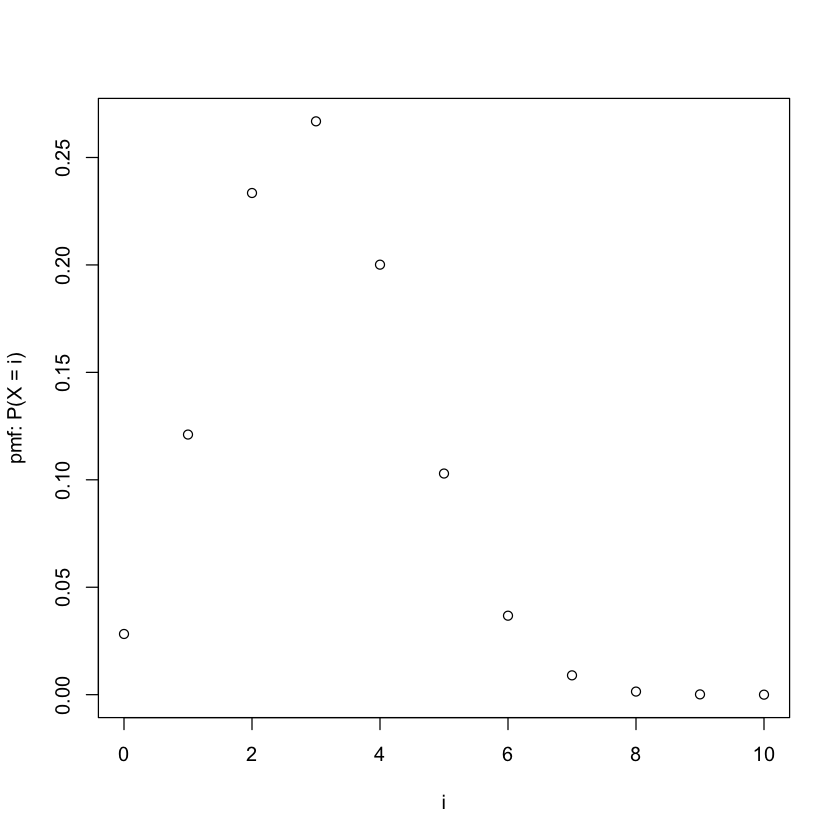

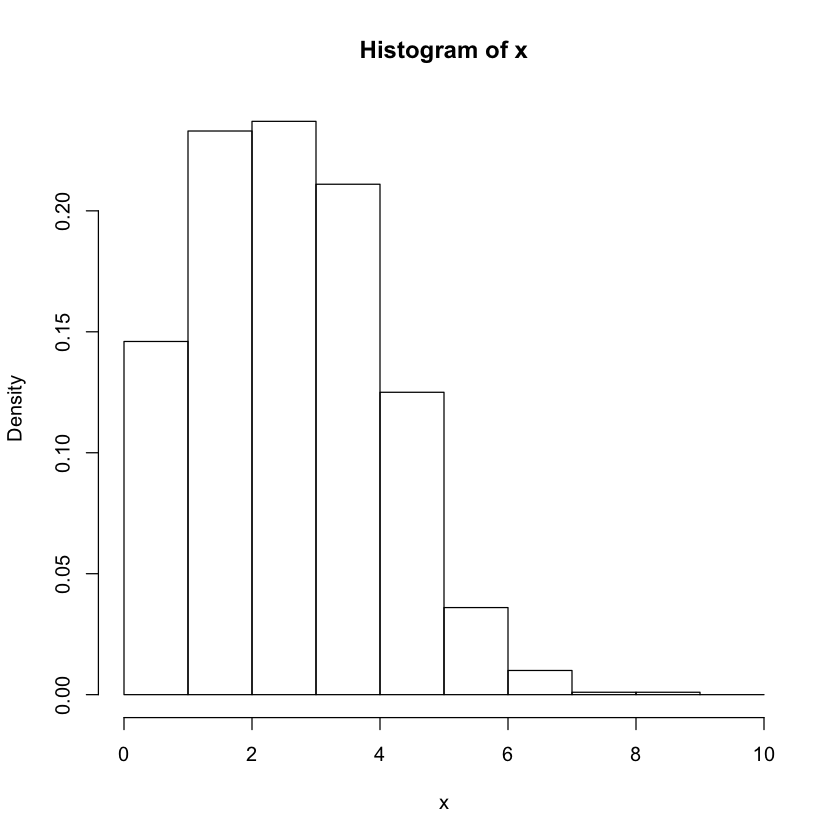

In [1]:
nsamples = 1000
n = 10
p = 0.3
y = dbinom(0:10, n,p)
plot(0:10, y, xlab = "i", ylab = "pmf: P(X = i)")
x = rbinom(nsamples, n, p)
#print(x[1:10])
hist(x, breaks = 0:10, freq=F)

### Application example: Failure modes for a communications system

A communication system consists of $n$ components, each of which will independently function with probability $p$. The total system will be able to operate effectively if at least one-half of its components function. For what value of $p$ is a 5-component system more likely to operate effectively than a 3-component system?

**Solution:**  
Let $X_5$ be the random variable that denotes the number of functioning components in a 5-component system. $X_5$ has a Binomial distribution with parameters $(n=5, p)$. This is written as $X_5 \sim \text{Binom}(5,p)$. Similarly, we can define $X_3$ to be the random variable that denotes number of functioning components in a 3-component system. Again, $X_3 \sim \text{Binom}(3,p)$. A 5-component sytems needs at least 3 functioning components to function effectively. The probability that the 5-component system is functioning effectively is given by $P(X_5 > 2)$ which is written as:

\begin{eqnarray*}
  P(X_5 > 2)  & = & \underbrace{{\binom{5}{3}} p^3 (1-p)^2}_{P(\text{3 out of 5 functioning})} + \underbrace{{\binom{5}{4}} p^4 (1-p)^1}_{P(\text{4 out of 5 functioning})} + \underbrace{{\binom{5}{5}}) p^5 (1-p)^0}_{P(\text{all 5 functioning})} \\
              & = & {\binom{5}{3}} p^3 (1-p)^2 + {\binom{5}{4}} p^4 (1-p) + p^5
\end{eqnarray*}


Similarly, the probability that the 3-component system is functioning is given by

\begin{eqnarray*}
  P(X_3 > 1)  & = & {\binom{3}{2}} p^2 (1-p)^1 + {\binom{3}{3}} p^3 (1-p)^0 \\
              & = & {\binom{3}{2}} p^2 (1-p)^1 +  p^3
\end{eqnarray*}


For the 5-component system to  more likely  to operate than a 3-component system we want $P(X_5 > 2) > P(X_3 > 1)$. From which solving for $p$ we can show that $p > 0.5$.

## V.6. Geometric Distribution 

Here we also consider a sequence of independent $\text{Bern} (p)$ trials from two different but equivalent perspectives. (1) Let the random variable $X$ denote **the number of trial until  first success**. (2) Alternately, we can consider random variable $Y$ which denotes the **number of failures before the first success**. 

1) Considering $X$ first, it follows a geometric distribution which is written as 

$$X \sim \text{Geom}(p)$$ 

Here, we want to know the number of trials **up to and including** the first success. The pmf is given by

\begin{equation}
	P(X=k) = (1 - p)^{k-1} p ~~~~~~~~ k  \in \{1, 2, 3, \ldots, \infty \}
\end{equation}

The CDF is given by
\begin{eqnarray*}
F_X (x) &=& P(X \leq x) \\
        &=& \sum_{i = 1}^{\lfloor{x}\rfloor} P(X = i)
\end{eqnarray*}


2) Now we consider $Y$, which denotes the number of failures **before** the first success. $Y$ has a Geometric distribution which is written as 

$$Y \sim \text{Geom}^\text{*} (p)$$  

The pmf is given by:

\begin{equation}
	P(Y=k) = (1 - p)^{k} p ~~~~~~~~ k \in \{0, 1, 2, 3, \ldots, \infty \}
\end{equation}

Note that in this case the range of the random variable starts from 0. 

### V.6.a) Expectation and Variance

The Expectation for $X \sim \text{Geom}(p)$ is:  
\begin{equation}
 E(X) = \frac{1}{p}
\end{equation}



The Expectation $Y \sim \text{Geom}^\text{*}(p)$ is:  
\begin{equation}
E(Y) = \frac{1-p}{p}
\end{equation}


The Variance for either of the above two Geometric distributions is:  
\begin{equation}
Var(X) = Var(Y) = \frac{1-p}{p^2}
\end{equation}


### V.6.b) Properties

Caution! Here lies our first Random Variable which occupies a countably infinite sample space! Why? Because unlike the Binomial and Bernoulli, we are no longer limiting the number of trials. Bernoulli problems only concerned 1 trial and the Binomial was only concerned with how many times an outcome would occur with $n$ trials. So you'll see this extra "parameter" $k$ just floating around. In theory, $k$ is functioning like our little $x$ in the previous Random Variables. In practice, you can think of it as our "sanity" parameter; keeping us safely in the bounds of numbers that we care about and can actually compute. We will be varying k in practice over some finite vector of numbers.

1. The Geometric distribution has only one *true* parameter: $p$. 

2. The values that the random variable takes is countably infinite, i.e., the set of postive integers. 

3. Show that the above pmf is valid. This is done by showing two properties. First, we need to show that $P(X = i) \geq 0$ for all $i = 0, 1, 2, \ldots$. Second, we need to show that $\sum_{i=0}^{\infty} P(X = i) = 1$. These are easily shown.  

4. This distribution has a interesting property called the **memoryless property**. More about this after when we study the Poisson random variable.  


### Example: Job Scheduling in an Operating System  
Consider a job in a run queue in an OS kernel. The job is assigned some discretized quantum of processing time in which it finishes the required computation with probability $1-p$ or requires another quantum with probability $p$. What is the probability that the job will require **more than  2** quanta to finish its computation?

**Note** the probability of completing in any given quantum is independent following Bern(1-p), and we will consider a sequence of independent quanta. So the probability it requires $k$ quanta is the probability it did not complete in the first $k-1$ quanta and succeeds on the $k$th -- a geometric distribution. But it will look slighty different than the formulas above since here the probability of success is 1-p (rather than p as used above). 

![job-scheduler](Figures/job-scheduler.jpg)


Let $X$ be the random variable that denotes the number of quanta that the job requires to complete the computation. $X$ has a Geometric distribution  and is given by

\begin{equation*}
P(X = i) = p^{i-1} (1 - p)  ~~~~~~ i = 1, 2, 3, \ldots \infty
\end{equation*}

The job needs at least 1 quanta. Hence, the $X$ starts from $x_i =1$.  

We want to find $P({X > 2})$ which is given by
\begin{eqnarray*}
P({X > 2}) &=& 1 - P(X \leq 2) \\
         &=& 1 - \underbrace{P(X = 1)}_{\text{Requires 1 quantum}} - \underbrace{P(X = 2)}_{\text{Requires 2 quanta}} \\
         &=& 1 - (1-p) - p(1-p) \\
         &=& p^2
\end{eqnarray*}


### V.6.c) R Functions

Just like the Binomial distribution, there are four functions - dgeom, pgeom, qgeom, and rgeom. They are exactly like the functions for the Binomial distribution except that there is only one parameter for the Geometric distribution which is the probability $p$. 

Note that **it uses the Geometric* distribution of number of failures until success**, or $X \sim \text{Geom}^{*}(p)$. 

1. dgeom takes arguments $j,p$ and returns the PMF, $p_j$. (Recall $p_j = P(X=j)$.)
2. pgeom takes arguments $x,p$ and returns the CDF, $F_X(x)$.
3. qgeom takes arguments $x,p$ and returns the first value of $j$ for which the CDF is just greater than or equal to the specied value $x$. 
4. rgeom samples from the geometric distribution 

In [79]:
help("pgeom")

#### Plot the CDF of $Y  \sim \text{Geom}^*(0.5)$

 [1] 0.5000000000 0.2500000000 0.1250000000 0.0625000000 0.0312500000
 [6] 0.0156250000 0.0078125000 0.0039062500 0.0019531250 0.0009765625
[11] 0.0004882812
 [1] 0.5000000 0.7500000 0.8750000 0.9375000 0.9687500 0.9843750 0.9921875
 [8] 0.9960938 0.9980469 0.9990234 0.9995117


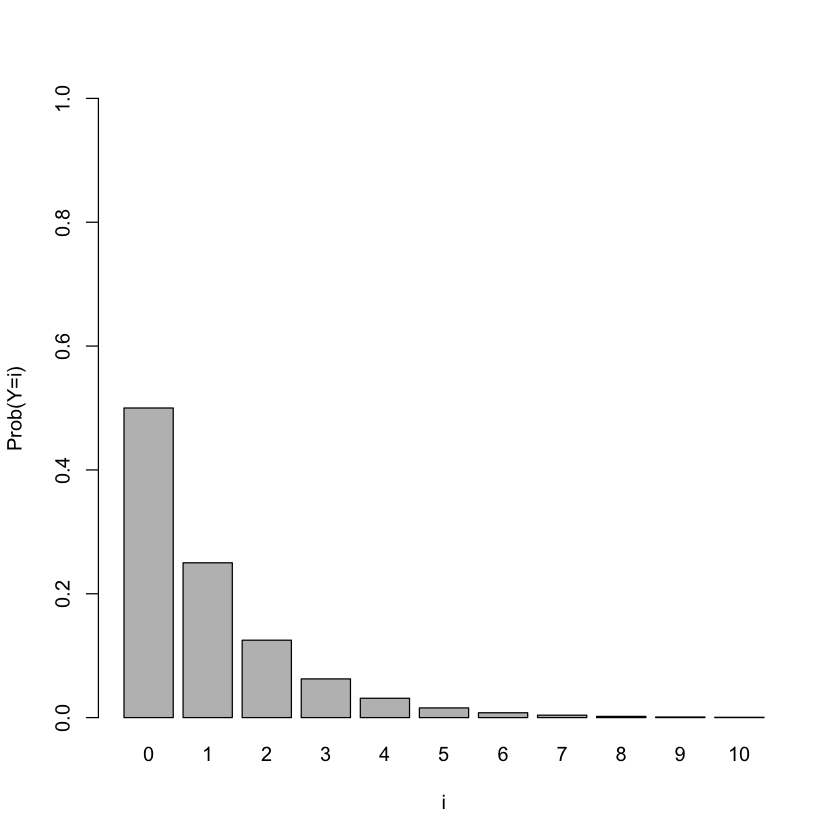

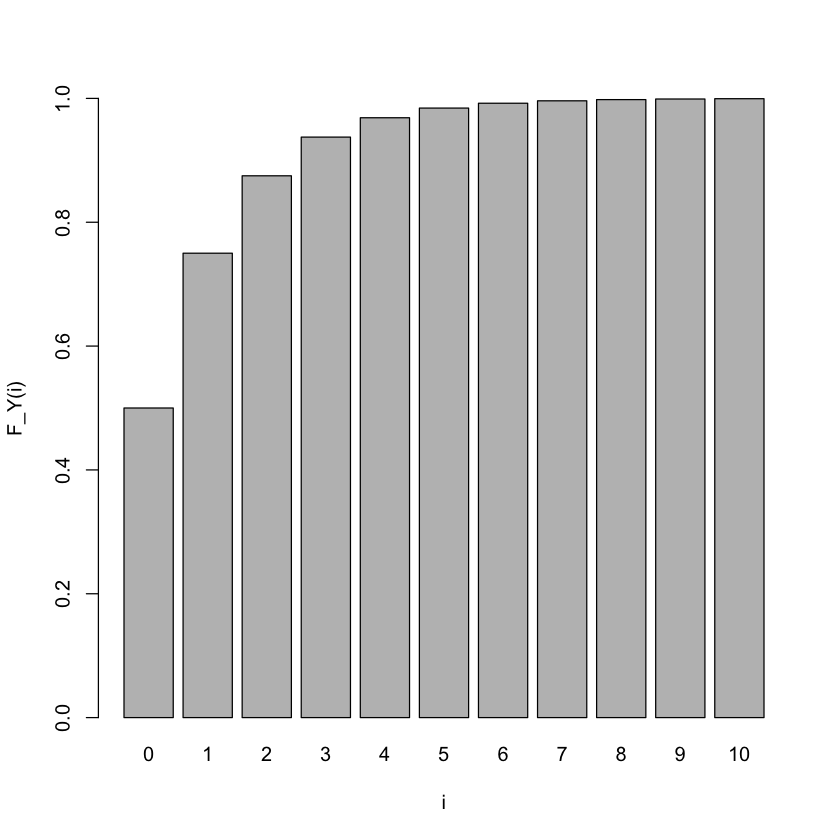

In [78]:
n = 10                    # We give an upper cutoff to the number of trials we are interested in considering
p = 0.5
prob = dgeom(x=0:n, p)    # This is a vector, prob[i]= Prob(Y=i) here for i=0:n
print(prob)
cprob = pgeom(q=0:n, p)   # This is a vector with the CDF F_Y(q) for q=0:n
print(cprob)
barplot(prob, names.arg=0:n, ylim=c(0,1), ylab="Prob(Y=i)", xlab="i")
barplot(cprob, names.arg=0:n, ylim=c(0,1), ylab="F_Y(i)", xlab="i")

### Practice Problems

### Medium Access Control (MAC) Protocol
Suppose $n$ nodes share a common broadcast channel. This is shown in Figure \@ref(fig:medium-access-control) What that means is that when one node transmits a packet it is heard by all the other nodes. Consequently, if two or more nodes transmit packets "near simultaneously", their transmissions will collide and the bits in the packet will be garbled.



![medium-access-control](Figures/MAC_Protocol.jpg)


A important goal is to design a distributed MAC protocol that minimizes the collisions. To study this we make the following assumptions:  
1. There are $n$ independent and identical nodes  
2. Time is divided into slots  
3. All transmission attempts are made at the beginning of a time slot  
4. If a packet arrives in a time slot, the station will attempt its transmission at the beginning of the next slot  
5. Each node, attempts to transmit at most one packet in a given timeslot. The probability it has a packet to transmit is denoted by $p$  
6. There is no buffer in the node. If a packet is not "successfully" transmitted it is  lost.

Thus a slot can either be in one of three states (as illustrated above): $S, I, C$ denoting successful transmission, idle, and collision respectively. 

For any given slot, let $X$ denote the random variable  that a node has a packet to transmit. If we define Success to denote that the node has a packet to transmit, then $X \sim \text{Bern}(p)$.  Hence,

\begin{eqnarray*}
P(\text{success}) &=& P(X = 1) \\
                  &=& p \\
P(\text{failure}) &=& P(X = 0) \\
                  &=& 1 - p
\end{eqnarray*}

In any given time slot, let $Y$ be the random variable that denotes the number of nodes that have packets to send. Nodes that have packets to send will be referred to as **active nodes**. $Y$  can take vales $\{0, 1, 2, \ldots ,n\}$. Since the nodes are independent $Y \sim \text{Binom}(n,p)$. Hence we have  the PMF which gives the probability that $k$ nodes are active

\begin{eqnarray*}
P(Y=k) &=& P(\text{$k$ nodes are active})  \\
       &=& \binom{n}{k}p^k (1-p)^{n-k}
\end{eqnarray*}


If two or more nodes transmit in the same slot, then their transmissions will  collide and both the packets will be garbled. We will refer to this as a **collision**. Let $P_c$ denote  the probability of collision and this given by

\begin{eqnarray*}
P_C &=& P(\text{two or more nodes are active in a slot}) \\
    &=& \sum_{k=2}^{n} P(Y = k) \\
    &=& 1 - P(Y = 0) - P(Y = 1) \\
    &=& 1 - \binom{n}{0} p^0 (1-p)^n - \binom{n}{1} p^1 (1-p)^{n-1} \\
    &=& 1 - (1-p)^n - np(1-p)^{n-1}
\end{eqnarray*}

One of the goals of the MAC protocol is to minimize the number of collisions. Can you find the the value of $p$ that minimize $P_c$?  <em>(We leave this an an exercise for the reader;  take the derivative of $P_C$ w.r.t. $p$, set it equal to zero and solve for $p$.)</em>


We can also find the following two probabilities  
\begin{eqnarray*}
P_S &=& P(\text{successful transmission in a slot}) \\
    &=& P(Y = 1) \\
    &=& np(1-p)^{n-1}
\end{eqnarray*}

and

\begin{eqnarray*}
P_I &=& P(\text{slot is idle, i.e., no packet transmission attempt}) \\
    &=& P(Y = 0) \\
    &=& (1-p)^{n}
\end{eqnarray*}


One of the assumptions we made is that there is no buffer  in each node. What that means is that if there is a collision, packets in all the nodes that collide are lost. We make this assumption to simplify the model. In reality, there will be a buffer and the packet may be re-attempted in a subsequent slot. A consequence of our assumption is that we can treat the outcomes in the slots to be independent. In other words, what happens in a slot is not impacted by what happened in the the previous slots.

Let $Z$ be a random variable that denotes the number of unsuccessful (collision or idle) slots before a successful transmission. $Z$ can take values $0, 1, 2, \ldots $. If $S, I, C$ denote the successful transmission, idle, and collision, in a slot, respectively. Then, the sequence ICS would correspond to $Z = 2$. We can see that $Z \sim Geom$*$(q)$ where $q = P_S = np(1-p)^{n-1}$ and the pmf is given by

\begin{equation*}
P(Z = k) = (1 - q)^k q  ~~~~~~~~~~~ k \in \{0, 1, 2, \ldots \}
\end{equation*}

and so $P(Z=4) = (1-q)^4 q$.


## V.7. Poisson Process and the Poisson Distribution


![poisson-process](Figures/Poisson-Process.jpg)



Consider that events occur in time.  For instance it could be people arriving in line at a Starbucks, or jobs arriving in a service queue, where each arrival is considered an event. Let $N(t)$ be a counting process that counts the number of events that occur in some interval of time $t \geq 0$. The only parameter we need to consider is $\lambda$ the **rate** it can be given in out of two ways: (i) the expected number of events per unit time (i.e., #events/time); or (ii) the expected number of events in a specified period of time (i.e., #events).  We will define it both ways.  Which one you use depends on whether the problem statement. The second way is more standard and considers the number of events that arrive during a fixed time interval. The first way allows more flexibility since it considers the number of events that arrive during a variable time interval. We start here with method (i). 

### $\lambda$ given as events per unit time (i.e., a rate):

$N(t)$ is a **Poisson process** with rate $\lambda$ if the following properties are satisfied:

1. $N(0) = 0$;  
2. The number of events that occur in disjoint (i.e., non-overlapping) time intervals are independent;  
3. The distribution of the number of events in a given interval depends only on the length of the interval and not on the location in the interval;  
4. For small values of $h$,  
\begin{equation*}
P(N(h) =1) = \lambda h + o(h)
\end{equation*}
where $o(h)$ is any function $f(h)$ for which  
\begin{equation*}
lim_{h \rightarrow 0} \frac{f(h)}{h} =0
\end{equation*}  
5. $P(N(h) = 2) = o(h)$.  


Like the Geometric Random Variable a Poisson Random Variable also can take on values that go to infinity. What do they have in common? They're both counting the number of times something happens given some specified parameters, except the Poisson random variable is counting the number of times something happens in a given window of time t, whereas the geometric was counting the number of times up to the first success. 

We can contrast this also with the Binomial Random Variable we were simply asking the probability that out of a finite number of trials ($n$), we had "success" some finite number of times ($k$). The Bernoulli was even more limited to just considering the probability of success of a single trial.

If $N(t)  \sim \text{Pois} (\lambda)$ then the PMF is given by the formula below, where $k$ takes in integer values. 

\begin{equation*}
P(N(t) = k) = \frac{e^{-\lambda t} (\lambda t)^k}{k!} ~~~~~~~~~~ k \in \{0, 1, 2, \ldots \}
\end{equation*}

### $\lambda$ given as the expected number in a fixed time interval:

Here the time window under consideration is specified (i.e., we expect a certain number of calls to arrive in a call center each day).  Let $X$ denote the random variable corresponding to how many events occur in that given time window. 

\begin{equation*}
P(X = k) = \frac{e^{-\lambda} (\lambda)^k}{k!} ~~~~~~~~~~ k \in \{0, 1, 2, \ldots \}
\end{equation*}


### Example 1: Requests to a Web Server ($\lambda$ as a rate)
Requests arrive independently to a web server with parameter $\lambda = 0.3$/sec. Let $X$ denote the random variable corresponding to the number of calls that arrive in a 10 second interval. What is $P(X)=3$? (i.e., the probabilty that $N(10)=3$.)

**Solution:**  
Note  that we can write  $X \sim \text{Pois} (0.3)$ where the parameter is the rate, i.e., the expected number of arrivals per second.  Using the  pmf of the Poisson distribution

\begin{eqnarray*}
P(N(10)= 3)  &=&  \frac{e^{-\lambda 10} (\lambda 10)^3}{3!} \\
					 &=&  \frac{e^{-3} (3)^3}{3!}
\end{eqnarray*}

### Example 2: Requests to a call center ($\lambda$ as a number)
Assume that the number of calls that arrive in a call center, $X$, each day $\lambda =100$. What is the probabilty that 200 calls arrive on any given day? 

**Solution:**  
Note  that we can write  $X \sim \text{Pois} (100)$ where the parameter is the expected number of arrivals each day.  Using the  pmf of the Poisson distribution

\begin{eqnarray*}
P(X = 200)  &=&  \frac{e^{-\lambda} (\lambda)^{200}}{200!} \\[2mm]
					 &=&  \frac{e^{-100} (100)^{200}}{200!}
\end{eqnarray*}



### V.7.a) Expectation and Variance of the Poisson Distribution
If $X \sim Pois(\lambda)$ then both $E(X)=\lambda$ and $Var(X)=\lambda$. For the expected value, this makes sense intuitively when you recall that $\lambda$ is, after all the "rate" parameter. Broadly, the values for both the Expectation and the Variance stem from the fact that:  
\begin{equation}
e^x=\sum_{k=0}^\infty \frac{x^k}{k!}
\end{equation}

by the Taylor Series Expansion of the Exponential.

### V.7.b) Relationship Between Poisson Distribution and Binomial Distribution


Let $A_i, A_2, A_3, \ldots, A_n$ denote events with $P(A_j) =p_j$. If $n$ is large and the $p_j$'s are small and if the events are independent or "weakly dependent," then the number if events that occur is approximately $\text{Pois} (\lambda)$ where $\lambda = \sum_{j=1}^n p_j$.

If the events are independent and all the probabilities are equal, meaning $p_j =p \ \forall j$, then we have a sequence of Bernoulli trials with large $n$ and small $p$. The number of "successful" events out of the $n$ total events is a random variable $X \sim \textbf{Binom}(n, p)$. Furthermore, when $n \rightarrow \infty$ and $p \rightarrow 0$ such that $np$ is constant, then $X$ can be well approximated by $\text{Pois} (\lambda)$ where $\lambda = np$.

***Example: Birthday Problem with 3 Matching People***  
Use the above to get an approximation for the probability in a room with $n$ people there is at least one triplet with the same birthday.

### V.7.c) Relationship Between Poisson Process and Exponential Distribution

Consider events that follow the Poisson process with parameter $\lambda$. Let $Y$ be a random variable that denotes the waiting time between events; i.e., starting from an event what is the time until the next event. This is also called the **inter-arrival time.**

\begin{eqnarray*}
P(Y \leq t) &=& 1 - P(Y > t) \\
                  &=& 1 - \text{Probability there no arrivals in time $t$} \\
                  &=& 1 - P(N(t) = 0)  \\
                  &=& 1 - e^{- \lambda t}
\end{eqnarray*}
which means that $Y \sim \text{Expo} (\lambda)$.  More on exponential distributions when we discuss continuous random variables. 


### V.7.d) R Functions

Just like the other distribution there  are 4 functions dpois, ppois, qpois, and rpois.  These calculate repectively the PMF, CDF, Quantile measurement, and samping from the Poisson distribution. The Poisson distribution has a single parameter $\lambda$.





### V.7.e) Superposition of Poisson Processes

If $N_1 \sim \text{Pois}(\lambda_1)$ and $N_2 \sim \text{Pois}(\lambda_2)$, then the superposition (union) of the two processes is  also a Poisson process with rate $\lambda = \lambda_1 + \lambda_2$. 

[//]: # "![superposition](/Figures/superposition-poisson.jpg)"


In fact, the above theorem can generalizes to superposition of arbitrary number of Poisson processes. 

### Practice Problem 


Suppose the number of accidents occurring in the highway each day is Poisson random variable with parameter $\lambda = 3$;

  1. Find the probability that 3 or more accidents occur today.
  2. Repeat the above under the assumption that at least 1 accident has already occured today.


#### Answer

Let $X$ be the random variable that denotes the number of accidents that we expect to occur today, $N({\rm 1day})$. Since $X$ is a Poisson random variable

\begin{equation}
  P\{X = i \} = \frac{e^{-\lambda} \lambda^i}{i!}
\end{equation}

Note we set $t=1$ day and our rate $\lambda$ will be in terms of expected number of accidents per day.  For the first part we need to find $P\{X \geq 3 \}$ and this given by

\begin{eqnarray*}
  P\{X \geq 3 \} &=& 1 - P\{X \leq 2 \}  \\[2mm]
                 &=& 1 - (P\{X = 0 \} + P\{X = 1 \} + P\{X = 2 \}  )\\[2mm]
                 &=& 1 - (0.04978707 +  0.1493612 +  0.2240418) \\[2mm]
                 &=& 0.5768099
\end{eqnarray*}

The numerical values above were obtained using the R functions dpois (see below).

For the second questions we want to find the conditional probability $P\{X \geq 3 | X \geq 1 \}$. Recall that

$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$  

So our answer is given by:

\begin{eqnarray*}
  P\{X \geq 3 | X \geq 1 \} &=& \frac{P\{X \geq 3 \cap  X \geq 1 \}}{P\{X \geq 1 \}} \\[2mm]
                            &=& \frac{P\{X \geq 3 \}}{P\{X \geq 1 \}} \\[2mm]
                            &=& \frac{0.5768099}{1 - (P\{X = 0 \})} \\[2mm]
                            &=& 0.6070323
\end{eqnarray*}

The second line follows since $A \cap B = A$ if $B \subseteq A$. And the numerical values were obtained using the R functions dpois and ppois.

In [16]:
# dpois(k,lambda)
dpois(0,3)  
dpois(1,3)
dpois(2,3)
1-ppois(2,3)

[1] 0.04978707

[1] 0.1493612

[1] 0.2240418

[1] 0.5768099

## V.8. Indicator Random Variable

Given any event $A$ in the sample space $S$ with $P(A)$ denoting the probability of event $A$. We define indicator random variable $X$ as follows
\begin{equation}
X =
\begin{cases}
	1 & \text{ if $A$ occurs} \\
	0 & \text{otherwise}
\end{cases}
\end{equation}

This is shown in Figure \@ref(fig:indicator-random-variable).


![indicator-random-variable](Figures/indicator-random-variable.jpg)


We have $P(X = 1) = P(A)$ and $P(X = 0) = P(A^\complement) = 1 - P(A)$.  The Bernoulli random variable is an Indicator random variable  with success being defined as event $A$ occurring.  Here are some properties that you can prove.

1. Show that $E(X) = P(A)$.

2. What is $\text{Var}(X)$?  (Hint, think of the Bernoulli distribution)

## Note: Linearity of Expectation

If $X_1, X_2, \ldots, X_n$ are random variables (independent or dependent), then $E(X_1 + X_2 + \ldots + X_n) = E(X_1) + E(X_2) + \ldots + E(X_n)$. This is a very important property and particularly strong since **it is true irrespective of whether $X_i$'s are independent or dependent**. 

Recall the general formula $E(X) = \sum_j p_j x_j$. So for the sum of two random variables: 

\begin{eqnarray*}
E(X_1 + X_2) &=& \sum_{j \in X_1} \sum_{k \in X_2} P(X_1=x_j, X_2=x_k) (x_j + x_k)\\[2mm]
             &=& \sum_{j \in X_1} \sum_{k \in X_2} P(X_1=x_j, X_2=x_k) x_j + \sum_{j \in X_1} \sum_{k \in X_2} P(X_1=x_j, X_2=x_k) x_k\\[2mm]
             &=& \sum_{j \in X_1} x_j \sum_{k \in X_2} P(X_1=x_j, X_2=x_k) + \sum_{k \in X_2} x_k \sum_{j \in X_1} P(X_1=x_j, X_2=x_k)\\[2mm]
             &=& \sum_{j \in X_1} x_j P(X_1=x_j) + \sum_{k \in X_2} x_k P(X_2=x_k)\\[2mm]
             &=& E(X_1) + E(X_2)
\end{eqnarray*}
            
This result can be extended for $n$ variables using induction.            

This property along with Indicator Random variables is an important tool for sometimes solving difficult problems. 

## V.8.a)  Coupon Collector Problem 


The following problem is called the coupon collector problem and has many applications in computer science. Assume there are $n$ different types of coupons. Each time one obtains a coupon it is independent of the previous selection and equally likely to be any of the $n$ types (i.e., sampling with replacement). Let the random variable $T$ denote  the number of coupons that were drawn in order to obtain a complete set of at least one of each type.

Here is the derivation of the expected number of coupons required to be drawn to collect the complete set. $T$ is a random variable and we need to find $E(T)$. Consider that $j-1$ distinct coupons have already collected. We define $T_j$ to be the number of additional attempts to collect coupons that are needed in order to collect the $j$th distinct coupon. Note that $n-(j-1) = n-j+1$ coupons have not yet been collected, and we sample from $n$ coupons in total.  Since we want to know the first attempt that collects a new coupon, $T_j$ follows a Geometric distribution,  $T_j ~\sim \text{Geom}(p_j)$ where $p_j = \frac{n-j+1}{n}$. From the properties of the geometric distribution we know that $E(T_j) = \frac{1}{p_j}$.


\begin{eqnarray*}
    E(T) &=& E(T_1 + T_2 + \ldots + T_n) \\[2mm]
         &=& E(T_1) + E(T_2) + \ldots + E(T_n) \\[2mm]
         &=& \frac{n}{n} + \frac{n}{n-1} + \frac{n}{n-2} + \ldots + \frac{n}{2} + \frac{n}{1}\\[2mm]
         &=& n \underbrace{(1 + \frac{1}{2} + \frac{1}{3} + \ldots + \frac{1}{n})}_{\text{Harmonic Series}} \\[2mm]
         &\approx& n ~log(n) + 0.5772~n + 0.5
\end{eqnarray*}


Note the harmonic series is related to overtones and harmonies in music.  [More info here.](https://en.wikipedia.org/wiki/Harmonic_series_(mathematics))

### Simulation of Coupon Collector Problem

Code for a single value of $N$

In [99]:
# N:      the number of unique coupons
# NSim:   the number of simulations that we will perform
# num:    record the number of trials needed to get a complete
#         set of one of each type of  coupon for each simulation

N=50
NSim=1000                 		 # Number of simulations
num=rep(0,NSim)              		 # This is  a vector initialized to 0; 
                                    # function rep(0,NSim) replicates the value 0, NSim times
for (i in 1:NSim){
  trials <-rep(0,0)                  # for a simulation intialize trials to empty
  while (length(unique(as.vector(trials)))<N){    # until all coupons collected
    trials<-cbind(sample(1:N,1),trials)  # withdraw a coupon and add to trials using cbind function 
    num[i]=num[i]+1                      # increment trials
  }
}


results <- list(N=N,
          Nnumber_Simulations=NSim,
          Simulation_mean=mean(num),
          Theoretical_value=N*log(N) + 0.5771*N +0.5)

print(mean(num))
print(N*log(N) + 0.5771*N +0.5)

print(results[[3]])  # This is to illustrate how to pull an item from a list 
print(results[[4]])

[1] 223.172
[1] 224.9562
[1] 223.172
[1] 224.9562


### Things we learned about R code from the coupon-collector simulation:

- rep(s,n)  #make a vector of lenth n where every element is initialize to s

- cbind(x,v) #extends the length of vector v by one and initializes the new element to value x

- list() #creates a list of elements which can be of different types (scalars, vectors, etc.)

- list[[,j]] #extracts the j'th element of the list 

###  A Fun Practice Problem

Consider the famous book <em>The Hobbit</em> and that Bilbo has to play a game with Gollum to escape. Gollum has given Bilbo a coin which Bilbo knows is biased with unknown probability $p$. His only hope is to able to devise a procedure such that is equally likely to result in either heads or tails. Clever as he is and with some prior inspiration from Gandolf he proposes to Gollum that in the game the result of a coin toss will not be detemined by a single toss but using the following procedure. 

  1. Flip the coin
  2. Flip the coin again
  3. If both flips land on heads or both lands on tails, return to step 1.
  4. Let the result of the last flip be the result of the experiment.  (i.e., the last two flips must have different outcomes.)

Show that the result is equally likely to be either heads or tails.

#### Answer

Here is one way to do this. Since $p$ is the probability of a head and $(1-p)$ is the probability of a tail on a toss of the biased coin, we have

$$P(th) = (1-p)p $$ 

and

\begin{equation*}
  P(hh ~ or ~ tt) = P(hh) + P(tt) = p^2 + (1-p)^2
\end{equation*}

Let P(H) be the probability of the final flip being a head following above algorithm. We conclude in the first round if we see the sequence (th).  We conclude in the second round if we see (hh) or (tt) followed by (th). We conclude in the third round if we see (hh) or (tt), followed by another (hh) or (tt), followed by (th), Etc. Putting the pieces together: 

\begin{eqnarray*}
  P(H) &=& P(th) + \left[P(hh ~ or ~ tt)\right] P(th) + [P(hh~ or ~tt)~P(hh~ or ~tt)] P(th) + \ldots \\[2mm]
       &=& (1-p)p + [p^2 + (1-p)^2](1-p)p + [p^2 + (1-p)^2]^2 (1-p)p + \ldots \\[2mm]
       &=& (1-p)p \sum_{i=0}^{\infty} (p^2 + (1-p)^2)^i \\[2mm]
       &=& (1-p)p \times \frac{1}{1 - (p^2 + (1-p)^2)}  \\[2mm]
       &=& (1-p)p \times \frac{1}{1 - p^2  -1 + 2p - p^2} \\[2mm]
       &=& (1-p)p \frac{1}{2p(1-p)} \\[2mm]
       &=& \frac{1}{2}
\end{eqnarray*}

And $P(T) = 1 - P(H) = 1/2$.

Note line 4 follows from line 3 since line 3 is an infinite geometric series.  
$$a + ar + ar^2 + ar^3 + \cdots \ \ = \sum_{j=0}^\infty ar^j \ \ = \frac{a}{1-r} \ \ \ \rm{for} \ \ \ |r| < 1$$

Here $a=(1-p)p$ and $r =\left(p^2 + (1-p)^2\right)$.

## VI.1. Expectation

The mean/expectation/average value of a random variable $X$ is denoted as $E(X)$. It is simply the result of multiplying each possible value of $X$ by its probability and summing.
\begin{equation}
E(X) = \sum_{x \in X } x \times P(X=x)
\end{equation}
Note that $x \in X$ implies over all values that the random variable takes.

1. This is called the weighted average of the different values the random variable takes, where the weights are the probabilities.  
2. In the summation we need only consider non-zero values that the random variable takes.  
3. The mean value need not be a value that the random variable takes.  


***Example: Tossing coins***
Suppose three coins are tossed.  We can define the following random variable
\begin{equation*}
Y = \text{The number of heads that appear}
\end{equation*}
What is $E(Y)$?

We can show that the values $Y$ can take are $\{0, 1, 2, 3\}$ and the pmf is $P(Y=0) = 0.125, P(Y=1) = 0.375, P(Y=2) = 0.375, P(Y=3) = 0.125$. Now $E(Y)$ is given by
\begin{eqnarray*}
E(Y) &=& 0 \times 0.125 + 1 \times 0.375 + 2 \times 0.375 + 3  \times 0.125 \\
     &=& 0.375 + 0.750 + 0.125  \\
     &=& 1.25
\end{eqnarray*}

Notice that we only need to consider non-zero values that the random variable takes. The first term in LHS does not contribute anything. Also, notice that the mean value 1.25 is not really a value that the random variable takes. In that sense the mean value is kind of strange.


***Example: Roulette***  
Suppose you play roulette and bet 10 dollars on red. Assuming an American table, you would win $10$ dollars with probability 18/38 and lose $10$ dollars  with probability 20/38. Let $X$ be the random variable representing your winnings. Using the above formula, the expected value of your winnings would be 
\begin{equation}
E(X) = 10 \cdot \frac{18}{38} + (-10) \cdot \frac{20}{38} = -0.526
\end{equation}
or about ($0.53$ dollars) in accountant's notation. Clearly a player at a roulette table won't be seen shaving $0.53$ dollars off their $10$ dollars chip on each play or tossing \$0.53$ at the dealer while shouting something about expected value, but instead this makes use of the Law of Large Numbers, which we will investigate in detail later when considering Limit Theorems. In short, however, it can be surmised that over many plays, the player will lose roughly $0.53$ dollars  per $10$ dollars  bet with very high probability.

### Example
Suppose $X \sim \text{Bern}(p = 0.2)$, What is the expectation of $X$?
\begin{eqnarray*}
E(X) &=& 1 \times P(X=1) + 0 \times P(X=0) \\
     &=& p \\
     &=& 0.2
\end{eqnarray*}


### Example
Suppose $X \sim \text{Binom}(n = 10, p = 0.3)$,  then
\begin{eqnarray*}
E(X) &=& \sum_{i=0}^{n} i \times P(X=i)  \\
     &=& \text{After some algebra} \\
     &=& np \\
     &=& 10 \times 0.3  \\
     &=& 3
\end{eqnarray*}

## Some Properties of Expectation

### Expectation of a Function of a Random Variable

Suppose $g(X)$ is some function of the random variable $X$.  We will state the following property without proving it.
\begin{equation}
E(g(X)) = \sum_{x \in X} g(x) P(X =x)
\end{equation}

Suppose $g(X) = X^2$, then

\begin{eqnarray*}
E(g(X)) &=&  \sum_{x \in X} g(x) P(X = x) \\
        &=&  \sum_{x \in X} x^2 P(X = x)
\end{eqnarray*}

***Example: Rolling One Die***  
Let a random variable $X$ be the resulting number. Compute $E(X^2)$.  
**Solution:**  
\begin{equation}
E(X^2) = \frac{1}{6}(1+4+9+16+25+36) = \frac{91}{6} \approx 15.1666
\end{equation}

## Scaling and Translation

Suppose $g(X) = a + bX$, then
\begin{eqnarray*}
E(g(X)) &=&  \sum_{x \in X} g(x) P(X = x) \\
        &=&  \sum_{x \in X} (a + bx) P(X = x) \\
        &=&  \sum_{x \in X} a P(X = x) + \sum_{x \in X} bx P(X = x) \\
        &=&  a \sum_{x \in X} P(X = x) + b \sum_{x \in X} x P(X = x) \\
        &=&  a  + b E(X)
\end{eqnarray*}

So, for example, if we add 4 to a random variable, then we add 4 to its expected value If we multiply that random variable by 3, then we multiply it's expected value by 3. 


## Linearity of Expectation

If $X_1, X_2, \ldots, X_n$ are random variables (independent or dependent), then $E(X_1 + X_2 + \ldots + X_n) = E(X_1) + E(X_2) + \ldots + E(X_n)$

This is a very important property and particularly strong since it is true irrespective of whether $X_i$'s are independent or dependent. This property along with Indicator Random variables is an important tool for sometimes solving difficult problems. We will illustrate this using two examples.

### Example: Aces in a Poker Hand
Given a 5 card hand, let $X$ denote the number of Aces. What is $E(X)$?

Let $X_j$ be an Indicator random variable that the $j$th card is an Ace. \begin{eqnarray*} E(X) &=& E(X_1 + X_2 + X_3 + X_4 + X_5) \\ &=& E(X_1) + E(X_2) + E(X_3) + E(X_4) + E(X_5) ~~~~~~~ \text{by Linearity of Expectation} \\ &=& 5 \times E(X_1) ~~~~~~~~~ \text{by Symmetry} \\ &=& \frac{5}{13} \end{eqnarray*}

Example: Expectation of an Indicator Variable in a Binomial Distribution
Let $X \sim Binom(n,p)$. We define $I_j$ to be the Indicator random variable denoting success in the $j$th trial. Thus $P(I_j = 1) = p$. We can now rewrite $X = I_1 + I_2 + \ldots + I_n$. Again using linearity of expectation and symmetry, we get $E(X) = E(I_1 + I_2 + \ldots + I_n) = n E(I_1) = np$.

### Example: Local Maxima

Consider a random permutation of numbers $1, 2, \ldots, n$ where $n \geq 2$. Find the expected number of local maxima.

Consider for example a sequence of 3, 2, 1, 4, 7, 5 , 6. For this 3 , 7 and and 6 are local maxima. Note that for the end points the comparison is made only with one adjacent number. For the other cases, comparisons is made with the two neighbors. Hence 7 is a local maxima.

Let $I_j$ be the Indicator random variable that denotes that the number in the $j$th position is a local maxima, $j \in 1,2, \ldots, n$. \begin{equation} I_j = \begin{cases} 0 & \text{if the $j$th position is not a maxima} \\ 1 & \text{if the $j$th position is a maxima} \end{cases} \end{equation}

\begin{eqnarray*} E(I_1 + I_2 + \ldots + I_n) &=& E(I_1) + E(I_2) + \ldots + E(I_n) \\ &=& \underbrace{2 \times \frac{1}{2}}_{\text{2 endpoints}} + \underbrace{(n-2) \times \frac{1}{3}}_{\text{(n-2) internal points}}\\ &=& \frac{n+1}{3} \end{eqnarray*}

## VI.2. Moments and Variance

If  $X$ is the random variable, $E(X)$ is the expected value and  also called the first moment. We discussed above that  $E(X) = \sum_{x \in X} x P(X=x)$.

$E(X^2)$ is  called the second moment and is given by  $E(X^2) = \sum_{x \in X} x^2 P(X=x)$.  
The Variance of $X$ is given by:  
\begin{equation*}
  Var(X) = E((X - \mu)^2)
\end{equation*}
where $\mu = E(X)$. It can also be shown that
\begin{eqnarray*}
        Var(X)  &=&  E((X - \mu)^2)\\
                &=& E(X^2 - 2 \mu X + \mu^2) \\
                &=& E(X^2) - 2 \mu E(X) + \mu^2 \\
                &=& E(X^2) - (E(X))^2
\end{eqnarray*}

## Standard Deviation
The standard deviation of a random variable (denoted $\sigma$) is a measure of how "spread out" a function is, or the typical deviation from the mean. Mathematically, the standard deviation is simply:  
\begin{equation}
\sigma(X) = \sqrt{Var(X)}
\end{equation}  
It is measured in the same units as $X$ and has the forgivingly simple scaling property:  
\begin{equation}
\sigma(aX) = |a|\sigma(X)
\end{equation}

***Example: Rolling a single die***  
Let $X$ be the resulting number. Find the variance and standard deviation of $X$.  
**Answer:**  
We already know that $E(X) = 7/2$ and $E(X^2) = 91/6$, so  
\begin{equation}
Var(X) = E(X^2) - (E(X))^2 = \frac{91}{6} - \frac{49}{4} = \frac{105}{36} \approx 2.9166
\end{equation}

Taking the square root of the variance, we get $\sigma(X) = \sqrt{Var(x)} \approx 1.7078$.

We will consider more about standard deviations when we discuss the Standard Normal Distribution.


## ** Update May 3 -- Clarifying details about a Poisson distribution 

## Poisson distribution; Pois($\lambda$)

The Poisson distribution has only one parameter, $\lambda$, which is the number of expected events in the time window of interest. Let $X$ correspond to the random variable denoting the number of events actually observed in the time window of interest. Then

$$ P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Note you may be given a *rate* such as "3 people arrive in one hour".  Then $\lambda$ = (rate) $\cdot$ (time). 

For instance if you are told "3 people arrive in one hour" and $X$ is the number that arrive in two hours then $X\sim Pois(\lambda)$ with $\lambda = (3/{\rm hour}) \cdot (2 {\rm hours}) = 6$.  Or if you want to know the number that arrive in one-half hour than $X\sim Pois(\lambda)$ with $\lambda = 3 \cdot (1/2)$ = 1.5.  Or if you want to know the number that arrive in ten-and-a-half hours than $X\sim Pois(\lambda)$ with $\lambda = 3 \cdot (10.5)=31.5$.  Etc. 

***Bottom line:*** $\lambda$ is determined by the rate of arrival multipled by the time window of interest. If you change the length of your window of time consideration, you must change $\lambda$ accordingly.  

If two independent Poisson processes are simultaneously happenning the random variable $X$ describing the number of total events observed is simply $X \sim Pois(\lambda)$ for $\lambda = \lambda_1 + \lambda_2$ where $\lambda_1$ is the expected nummber for process 1 and $\lambda_2$ the expected nummber for process 2. 

Wikipedia has a good article on the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). 

## VI.3. Basic data analysis: histograms, boxplots, median, quantiles, quartiles

### The Old Faithful Geyser

We are given data set in this case it is about the Old Faithful geyser in Yellowstone National Park.
Old Faithful is a cone geyser in Yellowstone National Park in Wyoming, United States. It was named in 1870 during the Washburn–Langford–Doane Expedition and was the first geyser in the park to be named.

In the early days of the park, Old Faithful was often used as a laundry

More than 1,000,000 eruptions have been recorded. Harry Woodward first described a mathematical relationship between the duration and intervals of the eruptions in 1938. Old Faithful is not the tallest or largest geyser in the park; those titles belong to the less predictable Steamboat Geyser. The reliability of Old Faithful can be attributed to the fact that it is not connected to any other thermal features of the Upper Geyser Basin.


The time between eruptions has a bimodal distribution (meaning two peaks in the PMF), with the mean interval being either 65 or 91 minutes, and is dependent on the length of the prior eruption. Within a margin of error of ±10 minutes, Old Faithful will erupt either 65 minutes after an eruption lasting less than 2.5 minutes, or 91 minutes after an eruption lasting more than 2.5 minutes. We will discuss this more when we talk about Markov Chains. 

![old-faithfu;](Figures/old-faithful-yellowstone.png)

The above picture is from the Internet. 



In [129]:
data <- read.table("./Data/Old_Faithful.txt", header=TRUE)
head(data)
tail(data)

date,time_between,duration
1,78,4.4
1,74,3.9
1,68,4.0
1,76,4.0
1,80,3.5
1,84,4.1


,date,time_between,duration
217,23,79,4.5
218,23,61,2.1
219,23,81,4.2
220,23,48,2.1
221,23,84,5.2
222,23,63,2.0


The first data column is the date in this case starts from 1. The second column is the time since the previous eruption (in minutes) and the third column is the duration of the eruption in minutes. Note how head (tail) can be used to peek at the top (bottom) of the data. Tail adds a first column which is just an index and it not part of the data. To extract the first column, we use data[,1], for the second column, data[,2], for the third column, data[,3], etc.  



In [136]:
data[,2]

[1] 78 74 68 76 80 84 50 93 55 76 58 74 75 80 56 80 69 57 90 42 91 51 79 53 82
 [26] 51 76 82 84 53 86 51 85 45 88 51 80 49 82 75 73 67 68 86 72 75 75 66 84 70
 [51] 79 60 86 71 67 81 76 83 76 55 73 56 83 57 71 72 77 55 75 73 70 83 50 95 51
 [76] 82 54 83 51 80 78 81 53 89 44 78 61 73 75 73 76 55 86 48 77 73 70 88 75 83
[101] 61 78 61 81 51 80 79 82 80 76 56 82 47 76 61 75 72 74 69 78 52 91 66 71 75
[126] 81 77 74 70 83 53 82 62 73 84 58 82 77 75 77 77 53 75 78 51 81 52 76 73 84
[151] 72 89 75 57 81 49 87 43 94 45 81 59 82 80 54 75 73 57 80 51 77 66 77 60 86
[176] 62 75 67 69 84 58 90 82 71 80 51 80 62 84 51 81 83 84 72 54 75 74 51 91 60
[201] 80 54 80 70 60 86 78 51 83 76 51 90 71 49 88 52 79 61 81 48 84 63

### Histogram
The frequency histogram takes the data creates a certain number of bins and gives a count of the number data elements that fall in the bins,


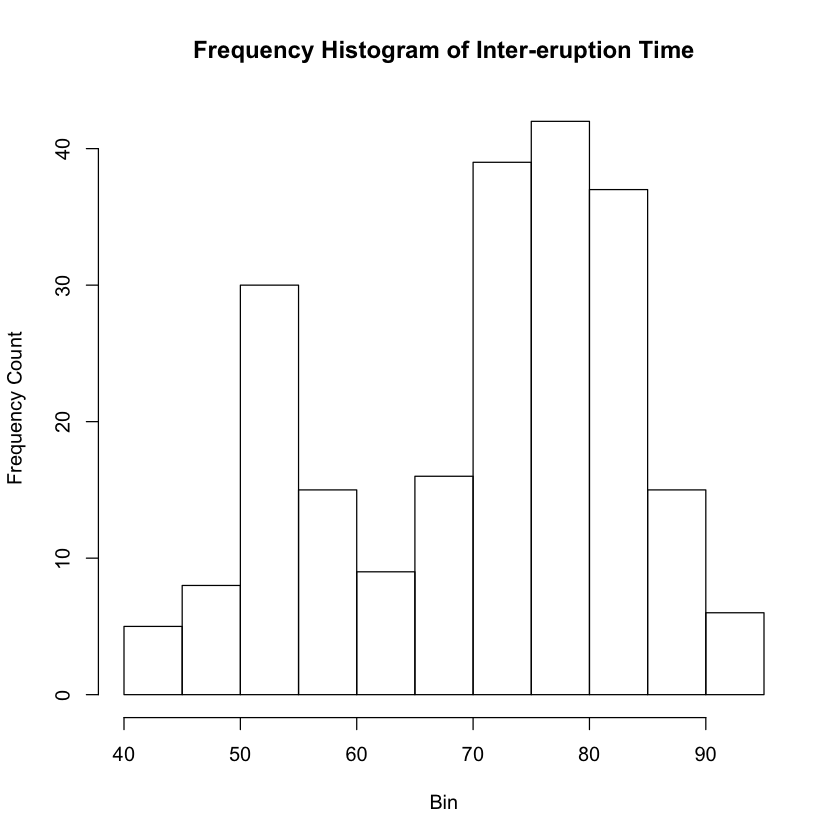

In [122]:
hist(data[,2], xlab = "Bin", ylab = "Frequency Count", main = "Frequency Histogram of Inter-eruption Time")

We can change the bin: consider all  possible values using the argument "breaks = seq(low,high,1)"

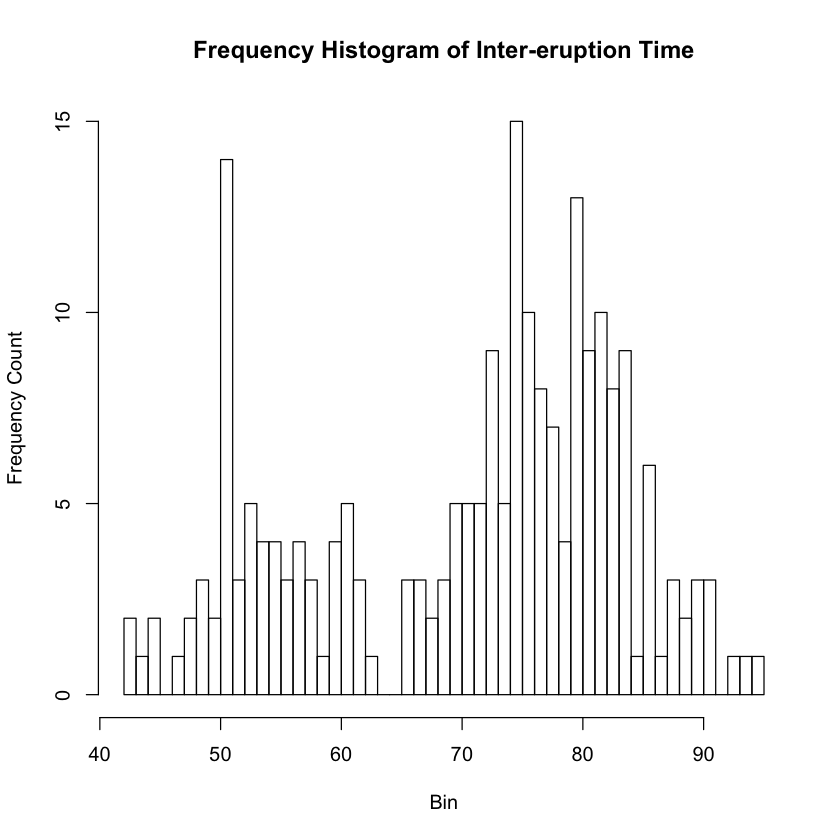

In [127]:
low = min(data[,2])
high = max(data[,2])
hist(data[,2], breaks = seq(low,high,1), xlab = "Bin", ylab = "Frequency Count", main = "Frequency Histogram of Inter-eruption Time")

We can see the **bimodal** nature of this distribution very clearly now. 

Instead of the number of counts on the y-axis, we can as easily plot the probability histogram by specifying "freq=FALSE".  

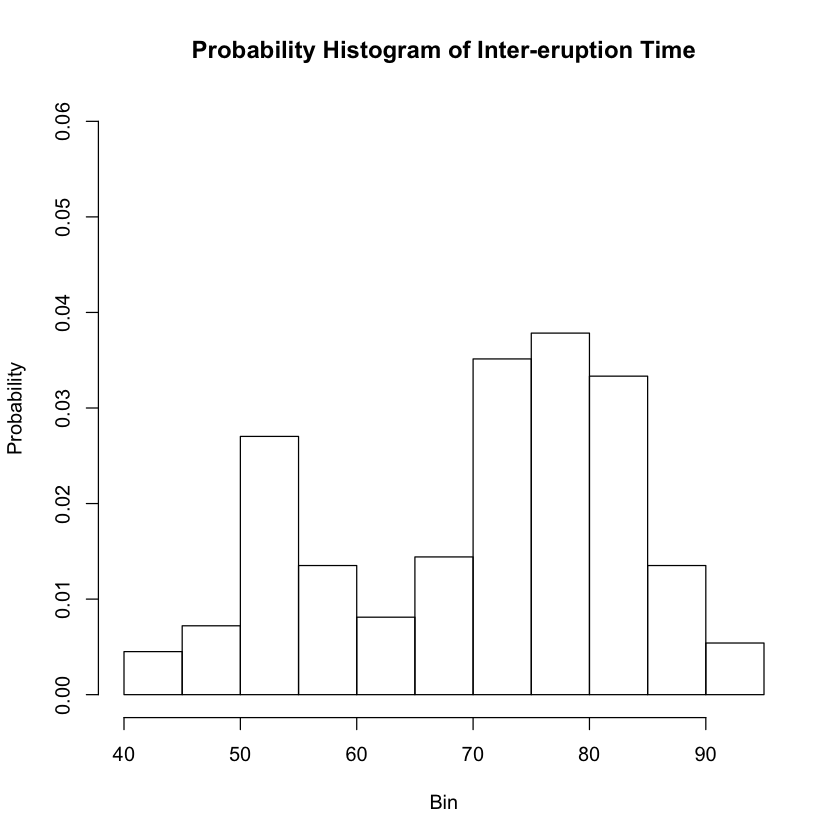

In [25]:
hist(data[,2], freq = FALSE, ylim = c(0,0.06), xlab = "Bin", ylab = "Probability", main = "Probability Histogram of Inter-eruption Time")

In [137]:
help("hist")

### Median, Quantiles, Quartiles, and Boxplots

The **median** is the data value such that 50\% of the data values are less than it (consequently, 50\% of the data values are greater than that value).

1. Median of {1, 2, 3, 4, 5} is 3.

2. Median of {1, 1, 3, 100, 10000000} is 3.

3. Median of {1, 2, 3, 4, 5, 6} is 3.5

In order to find the median, sort the values and then find the middle value.  Note in case 3 since there were an even number of elements in the set we took the average of the two middle ones. 

Similar to median, we can define other **quantiles**. The 25th quantile (called the "lower quartile") and denoted $Q_{25}$ is the data value such that 25\% of the data is below that value (and hence 75\%) of the data values are above it.  

The default quantile function in R gives the 0th quantile (minimum values) called $Q_0$, the 25th quantile (lower quartile) called $Q_{25}$, the 50th quantile (median) called $Q_{50}$, the 75th quantile (upper quartile) called $Q_{75}$, and 100 quantile (maximum value), called $Q_{100}$.

Note, if the **quantiles** are in increments of 25% they are called **quartiles** (e.g. $Q_{75}$ is the 75th quantile, also called the upper quartile).


In [69]:
# Standard quantile
quantile(data[,2])


0%  25%  50%  75% 100% 
  42   60   75   81   95

It is also possible to get **any other quantile**. Suppose we want to get 1, 5, 10, 90, 95, 99 quantiles, we give the following command:

In [88]:
# Specified quantiles
q = c(.01,.05,.10, .90, .95, .99)
quantile(data[,2], q)

1%    5%   10%   90%   95%   99% 
44.21 50.00 51.00 84.00 88.00 92.58

The above data can be visualized in a **boxplot** as shown below. By default it uses the standard quantiles.

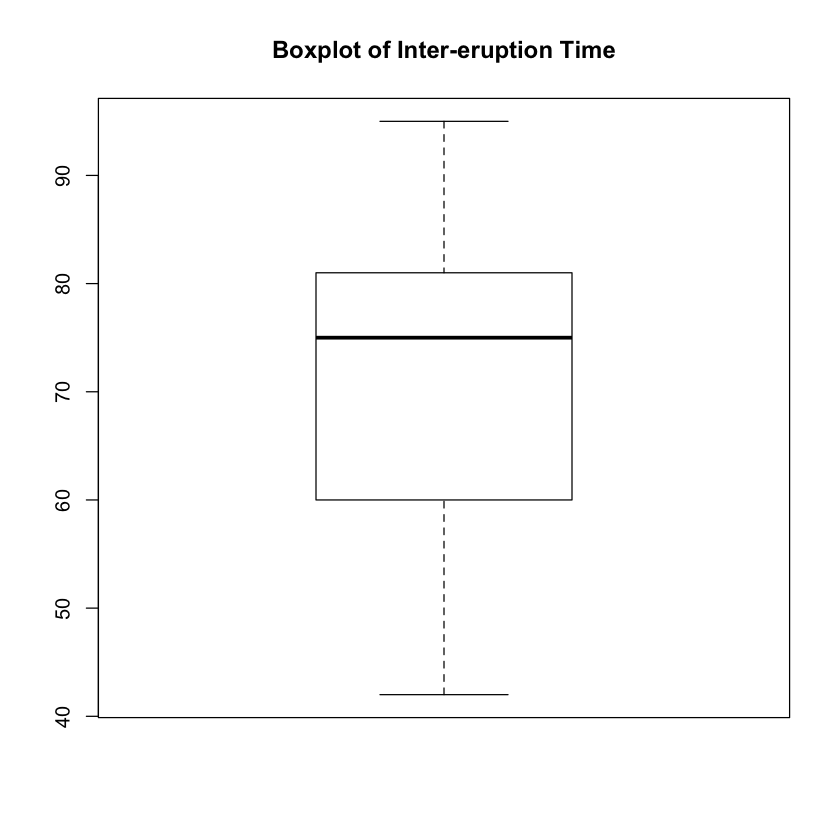

In [67]:
# Boxplot
boxplot(data[,2], main = "Boxplot of Inter-eruption Time")

Let's turn the box on its side and understand what is plotted (image thanks to Kahn Academy).  We have two boxes and two "whiskers":
<img src="./Figures/boxplot_basics.png" width="700">

The lowest point is the minimum of the data set $Q_0$ and the highest point is the maximum of the data set $Q_{100}$. The box is drawn from $Q_{25}$ to $Q_{75}$ with a horizontal line drawn in the box at the median value.

Note as in the picture above often $Q_{25}$ is written at $Q_1$ indicating the 1st quartile (25%) and $Q_{75}$ is written as $Q_3$ indicating the 3rd quartile (75%). 

In [70]:
help("boxplot")

In the plot above we have the bottom "whisker" ranging from $Q_0$ to $Q_{25}$ and the top "whisker" ranging from $Q_{75}$ to $Q_{100}$.  But we can also create a box plot to emphasize the outliers.  Let us define the **interquartile range** 

$$IQR = Q_{75} - Q_{25}$$

The box is still drawn from $Q_{25}$ to $Q_{75}$ but now we specifiy a range and the whiskers only extend a distance of range times the IQR, both above and below the box. All other observed points are plotted as outliers.  

Specifically, the bottom whisker starts at $Q_{25}$ and extends down to include all numbers larger than or equal to $Q_{25} - $ (range) $\cdot$ (IQR). The top whisker starts at $Q_{75}$ and extends up to include all number that are less than or equal to $Q_{75} + $ (range) $\cdot$ (IQR).

This uses the "range" argument to the "boxplot" function.  When range is specified, the whiskers extend only to the most extreme data point which is no more than ${\rm range} \times IQR$ from the box. Specifying range=0 causes the whiskers to extend to the data extremes. It is standard to use the value of range = 1.5.  

For the inter-eruption times, there are no outliers if range=1.5, so for illustrative purposes we use range=0.5 below: 

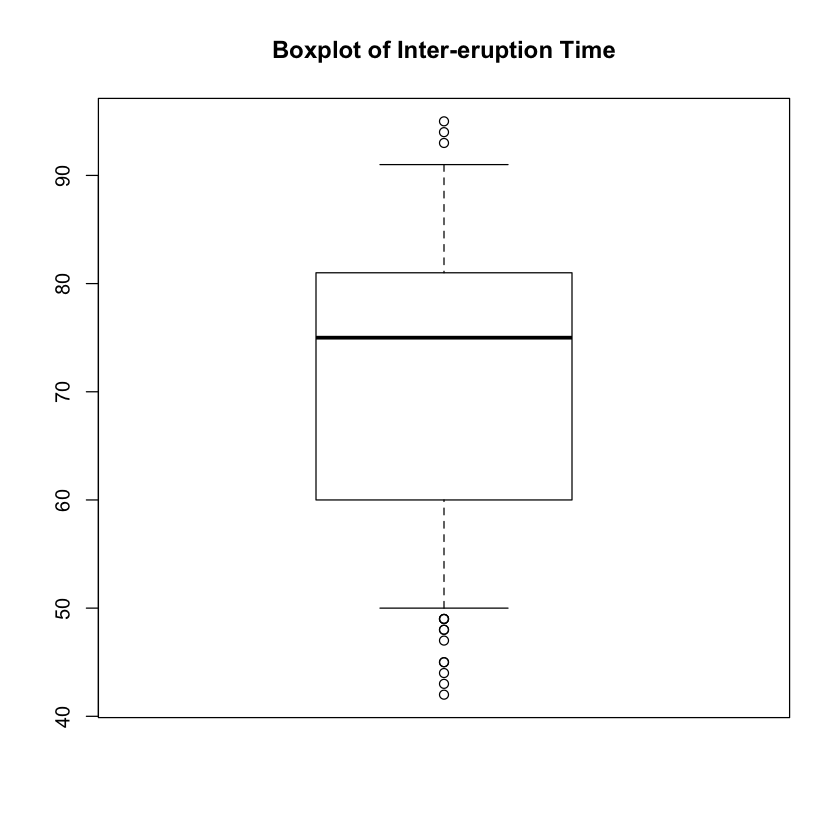

In [149]:
boxplot(data[,2], range=0.5, main = "Boxplot of Inter-eruption Time")

### Violin plots

If you want to get more fancy and have a plot of the shape of the distribution, try a [violin plot](https://en.wikipedia.org/wiki/Violin_plot).  [Here is information for how to do so in R](https://www.r-graph-gallery.com/violin.html).